In [21]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [32]:
x= np.linspace(1,100,40) 
y = np.array([ 7.7, 15.82307692, 23.94615385, 32.06923077, 40.19230769, 48.31538462, 56.43846154, 
              64.56153846, 72.68461538, 80.80769231, 88.93076923, 97.05384615, 105.17692308, 
              113.3 , 121.42307692, 129.54615385, 137.66923077, 145.79230769, 153.91538462, 
              162.03846154, 170.16153846, 178.28461538, 186.40769231, 194.53076923, 202.65384615, 
              210.77692308, 218.9, 227.02307692, 235.14615385, 243.26923077, 251.39230769, 
              259.51538462, 267.63846154, 275.76153846, 283.88461538, 292.00769231, 300.13076923, 
              308.25384615, 316.37692308, 324.5])

Best-fit parameters: a = 3.2, b = 4.5
Best-fit model equation: y = 3.2 * x + 4.5


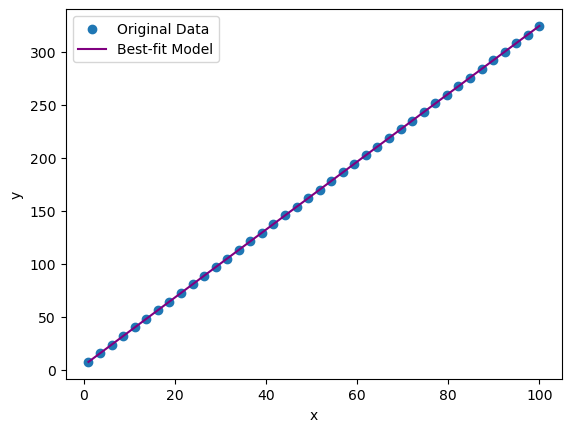

In [37]:
def model_function(x, a, b):
    return a * x + b

# Fit the model to the data
params, covariance = curve_fit(model_function, x, y, bounds=([0.1, 0.1], [10, 15]))

# Extract the best-fit parameters
a_fit, b_fit = params

# Print the results
print(f"Best-fit parameters: a = {round(a_fit,4)}, b = {round(b_fit,4)}")

# Use a and b to generate the best-fit curve 
x_mod = np.linspace(1, 100, 100)
y_mod = model_function(x_mod, a_fit, b_fit)

# Visual information
print(f"Best-fit model equation: y = {round(a_fit,4)} * x + {round(b_fit,4)}")

plt.scatter(x, y, label='Original Data')
plt.plot(x_mod, y_mod, color='purple', label='Best-fit Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [9]:
#Question 2:
print("Part A: ")
def wind_chill(T, V):
    """Calculates the wind chill temperature given the actual temperature and the wind speed."""
    wind_chill_temp = 35.74 + 0.6215 * T - 35.75 * V**0.16 + 0.4275 * T * V**0.16
    return wind_chill_temp
temperature = 20
wind_speed = 55

answer = wind_chill(temperature, wind_speed)
print(f"The wind chill is: {round(answer)} degrees Farenheit given a temperature of {temperature} degrees Farenheit and a wind speed of {wind_speed} mph")

Part A: 
The wind chill is: -3 degrees Farenheit given a temperature of 20 degrees Farenheit and a wind speed of 55 mph


In [13]:
print("Part B: ")
def parallax_to_distance(stars):
    """Converts parallax to dinstance for each given star in the dictionary. Stars is the dictionary with star names and parallax values"""
    mil_to_arc = 1/1000
    
    distance_data = {}
    for star, parallax in stars.items():
        if parallax:
            distance = 1 / (parallax * mil_to_arc)
            distance_data[star] = distance
        else: 
            distance_data[star] = None
    return distance_data 

stars_data = {
    'Betelgeuse': 7.63,
    'Antares': 5.89,
    'Spica': 13.06,
    'Proxima Centauri': 768.0  
}

results = parallax_to_distance(stars_data)
for star, distance in results.items():
    print(f"{star}: {round(distance, 2)} parsecs")


Part B: 
Betelgeuse: 131.06 parsecs
Antares: 169.78 parsecs
Spica: 76.57 parsecs
Proxima Centauri: 1.3 parsecs


In [30]:
print("Part C: ")
def lists_to_dict(list1, list2):
    """Takes in two lists and converts them to a single dictionary."""
    if all(isinstance(item, str) for item in list1):
        # list1 contains strings, so use it as keywords
        result_dict = dict(zip(list1, list2))
    elif all(isinstance(item, str) for item in list2):
        # list2 contains strings, so use it as keywords
        result_dict = dict(zip(list2, list1))
    else:
        raise ValueError("Both lists must be contain either strings or numbers.")

    return result_dict

list_1 = [1, 3, 5, 10, 12, 14]
list_2 = ['watermelon', 'melon', 'apple', 'strawberries', 'cherries', 'oranges']
result_dict_1 = lists_to_dict(list_1, list_2)
print("Dictionary 1:", result_dict_1)

# Example usage 2
list_3 = ['cars', 'motorcycles', 'bikes', 'skateboards']
list_4 = [200, 150, 10, 67]
result_dict_2 = lists_to_dict(list_3, list_4)
print("Dictionary 2:", result_dict_2)

Part C: 
Result 1: {'watermelon': 1, 'melon': 3, 'apple': 5, 'strawberries': 10, 'cherries': 12, 'oranges': 14}
Result 2: {'cars': 200, 'motorcycles': 150, 'bikes': 10, 'skateboards': 67}


In [24]:
def matrix_mult(matrix1, matrix2):
    if matrix1.shape[1] != matrix2.shape[0]:
        raise ValueError("Matrices dimensions are not equal and therefore not compatible for multiplication")
    
    result = np.zeros((matrix1.shape[0], matrix2.shape[1]))
    
    for i in range(matrix1.shape[0]):
        for j in range(matrix2.shape[1]):
            for k in range(matrix1.shape[1]):
                result[i, j] += matrix1[i,k] * matrix2[k,j]
    return result

In [38]:
#Example 1
A1 = np.array([[1, 2, 3], [4, 5, 6]])
A2 = np.array([[2, 3], [2, 2]])
result_A = matrix_mult(A1, A2)
print("Test 1:")
print(result_A)

ValueError: Matrices dimensions are not equal and therefore not compatible for multiplication

In [39]:
#Example 2
B1 = np.array([[1, 0], [0, 1]])
B2 = np.array([[4, 1], [2, 1]])
result_B = matrix_mult(B1, B2)
print("Test 2:")
print(result_B)

Test 2:
[[4. 1.]
 [2. 1.]]


In [40]:
# Example usage 3
C1 = np.array([[1, 0, 3], [0, 1, 4], [2, 1, 8]])
C2 = np.array([[4], [1], [5]])
result_C = matrix_mult(C1, C2)
print("Test 3:")
print(result_C)

Test 3:
[[19.]
 [21.]
 [49.]]
